In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [3]:
from sympy import (
    Derivative, 
    S, 
    Symbol, 
    series, 
    sqrt, 
    symbols, 
    oo, 
    limit, 
    Rational, 
    cos, 
    sin, 
    cosh, 
    sinh, 
    Matrix, 
    simplify, 
    latex, 
    lambdify,
    Function,
    collect,
    lambdify,
    solve,
    Eq,
    Poly,
    diff,
    nsolve
)
from sympy.core.numbers import NegativeOne, One, Zero
import numpy as np
import pandas as pd
from sympy import init_printing
init_printing() 

from sympy.printing.latex import print_latex
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook
from pymad_hzb.PlotTools import new_plot_elems_madx
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
from acchamiltoniansandmatrices.Matrices.SymbMatrices import (
    RsymbFODO, 
    RsymbDrift6D, 
    RsymbQuad6D, 
    RsymbQuad6DChroma, 
    RsymbQuad6DThin
)
from acchamiltoniansandmatrices.Matrices.NumpyMatrices import (
    RnpFODO, 
    RnpDrift6D, 
    RnpQuad6D, 
    RnpQuad6DChroma, 
    RnpQuad6DThin
)
from acchamiltoniansandmatrices.Hamiltonians.LatticeElementHamiltonians import (
    HamDrift6D, 
    HamDrift6DParaxialSecondOrder, 
    HamQuad6D, 
    HamQuad6DParaxialSecondOrder, 
    HamQuad6DParaxialSecondOrderChroma,
)
from acchamiltoniansandmatrices.Hamiltonians.Operators import Poisson
from acchamiltoniansandmatrices.Tracking.LinearMatrixTracking import nestList, LinMap, GenerateNDimCoordinateGrid
from acchamiltoniansandmatrices.LieMaps.LieOperator import LieOperator
from acchamiltoniansandmatrices.LieMaps.Poisson import PoissonBracket

from acchamiltoniansandmatrices.Utils.JupyterHelpFunctions import hide_toggle
from acchamiltoniansandmatrices.Utils.SymbolicFunctions import SymbolTrick, fixedpoints2D
from acchamiltoniansandmatrices.Utils.Plotting import multi_countour_plot

In [5]:
x, px, y, py, z, delta, eps, h , k0, k1, k2, sigma, betag ,f = symbols('x p_x y p_y z delta epsilon h k_0 k_1 k_2 sigma beta_gamma f', real=True)
L, beta0, gamma0 = symbols(" L beta_0 gamma_0", real=True, positive=True)

In [6]:
A = Function("A", commutative=False)(x,px)
B = Function("B", commutative=False)(x,px)
C = Function("C", commutative=False)(x,px)
D = Function("D", commutative=False)(x,px)
E = Function("E", commutative=False)(x,px)

Aop = LieOperator(A,x,px)
Bop = LieOperator(B,x,px)
Cop = LieOperator(C,x,px)
Dop = LieOperator(D,x,px)
Eop = LieOperator(E,x,px)

In [7]:
# Define constant number symbols in sympy - otherwise they are considered variables
LQF   = SymbolTrick("L_{QF}")
LQD   = SymbolTrick("L_{QD}")
LD    = SymbolTrick("L_D")
KQF   = SymbolTrick("K_{QF}")
KQD   = SymbolTrick("K_{QD}")

rep = list(zip(
    [
        LD,
        LQF,
        LQD,
        KQF,
        KQD,
        delta
    ],
    [
        3.5805,
        0.342,
        0.668,
        0.49,
        -0.4999,
        1.5e-3
    ]
)
          )


In [78]:
hamd  =  HamDrift6D(beta0, gamma0, LD,x,px,y,py,delta).subs(beta0*gamma0,oo).subs(beta0,1).subs(delta,Zero()).subs([(y,0),(py,0)])
hamqf = NegativeOne() * Rational(1,2) * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQF,x,px,y,py,delta,KQF).subs(delta,Zero()).subs([(y,0),(py,0)])
hamqd = NegativeOne() * HamQuad6DParaxialSecondOrder(beta0,gamma0,LQD,x,px,y,py,delta,KQD).subs(delta,Zero()).subs([(y,0),(py,0)])

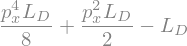

In [139]:
hamds = (hamd.subs(py,0)).series(px,0,6).removeO()
hamds

In [140]:
o = 3
ham1     = Aop.BCH(Bop,o).BCH(Cop,o).BCH(Dop,o).BCH(Eop,o).ham
fodoham1 = ham1.subs(A,hamqf).subs(B,hamds).subs(C,hamqd).subs(D,hamds).subs(E,hamqf).doit()

In [121]:
rep

In [127]:
fodoham1.expand().collect(x**2).collect(px**2).subs([(𝐿𝑄𝐹, 0.342), (𝐿𝑄𝐷, 0.668), (𝐾𝑄𝐹, 0.49), (𝐾𝑄𝐷,-0.4999)])

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


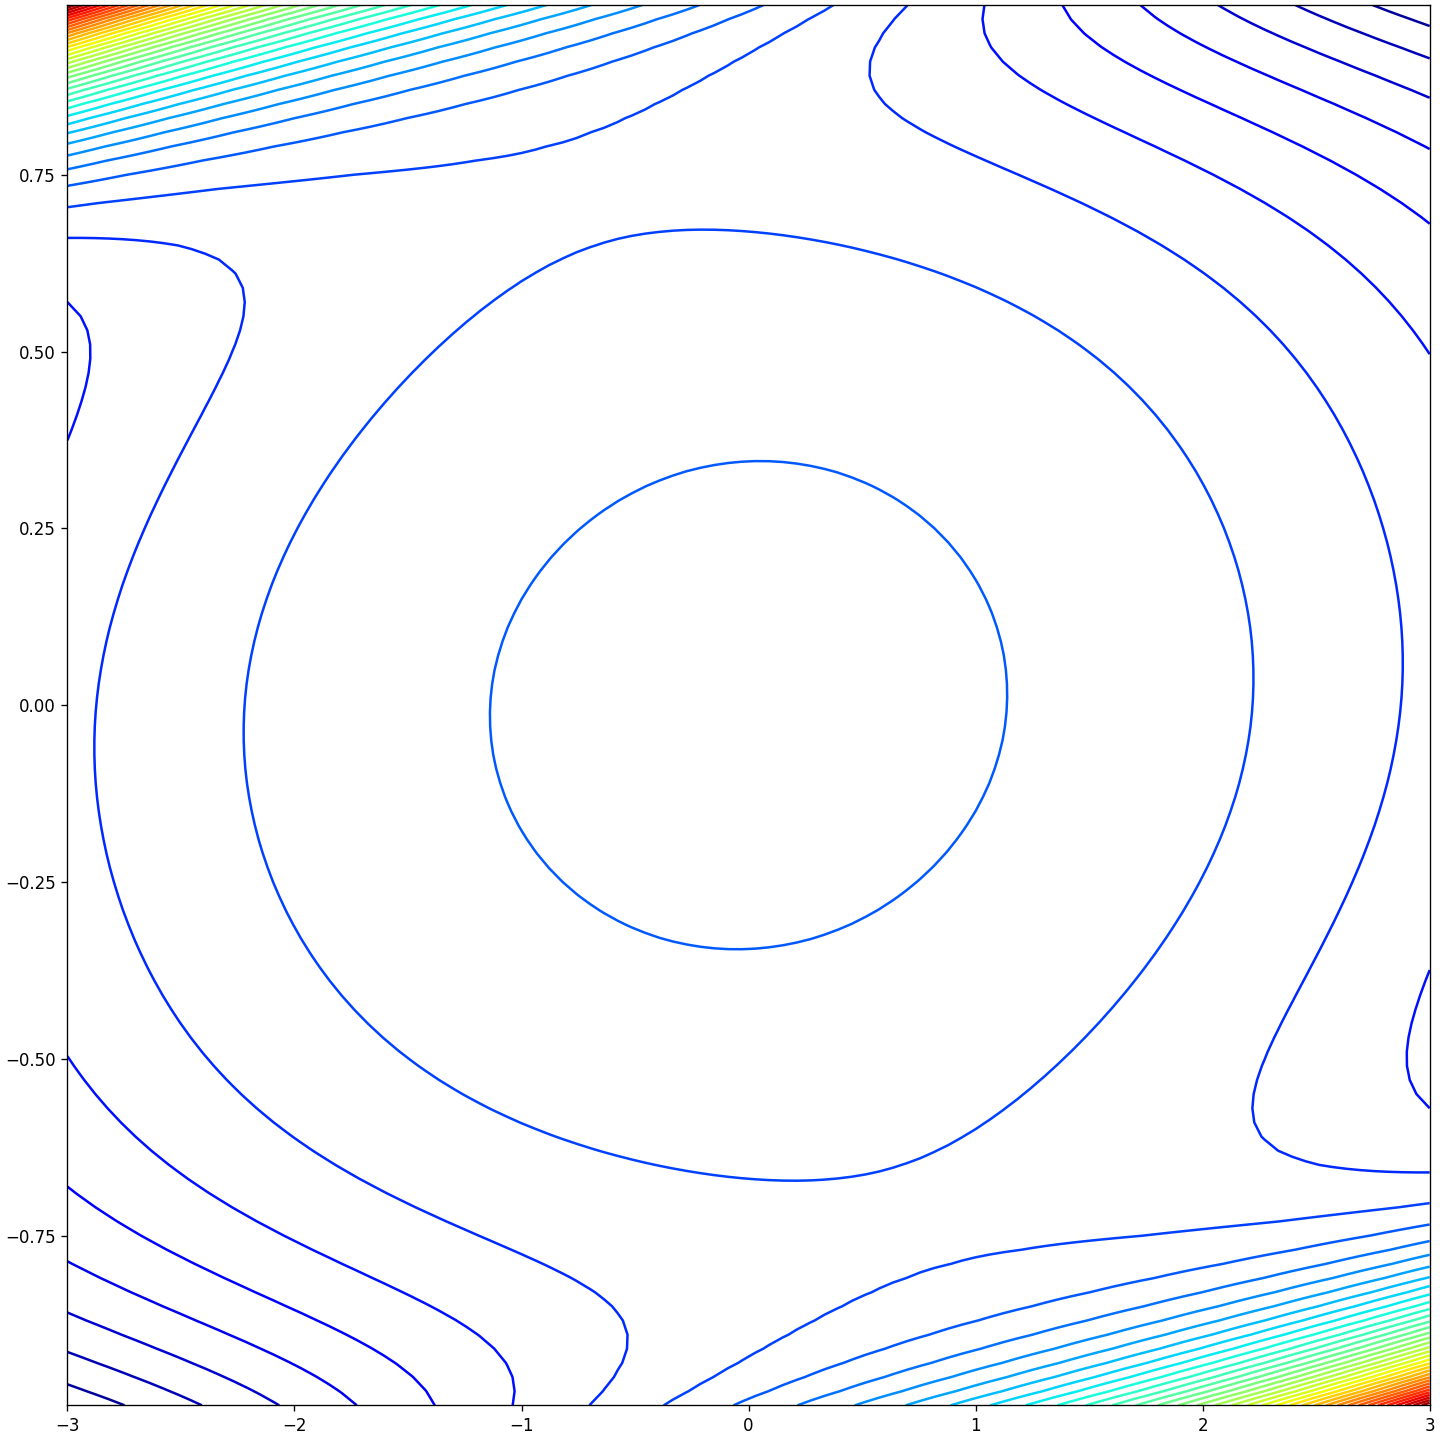

In [143]:
fodoham1num = lambdify((x,px),fodoham1.subs([(𝐿𝑄𝐹, 0.342), (𝐿𝑄𝐷, 0.668), (𝐾𝑄𝐹, 0.49), (𝐾𝑄𝐷,-0.4999)]).subs(LD,7),'numpy')

multi_countour_plot(
    [fodoham1num], 
    titlelist=["$1^e$ order","$2^e$ order","$3^e$ order","$4^e$ order"],
    xlabels=[r"$x$"]*4,
    ylabels=[r"$p_x$"]*4,
    xrange=3,
    prange=.99,
)

In [51]:
theta = symbols("theta", real=True, positive=True)

In [52]:
R = Matrix(
    [
        [cos(theta), -sin(theta)],
        [sin(theta), cos(theta)]
    ]
)

xt, pxt = R * Matrix([[x],[px]])

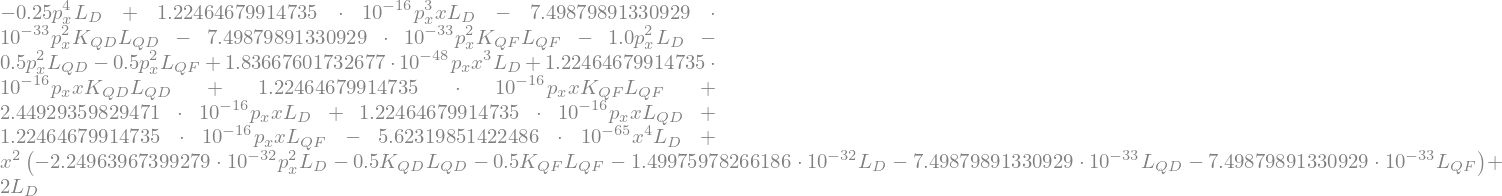

In [56]:
fodoham1.expand().collect(x**2).collect(px**2).subs([(x,xt),(px,pxt)]).expand().subs(theta, np.pi).simplify().collect(x**2)